# Segnale non difettoso



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os


def getSignalFromFile(file_path):
    """Legge un segnale da un file di testo."""
    signal = np.loadtxt(file_path)
    return signal

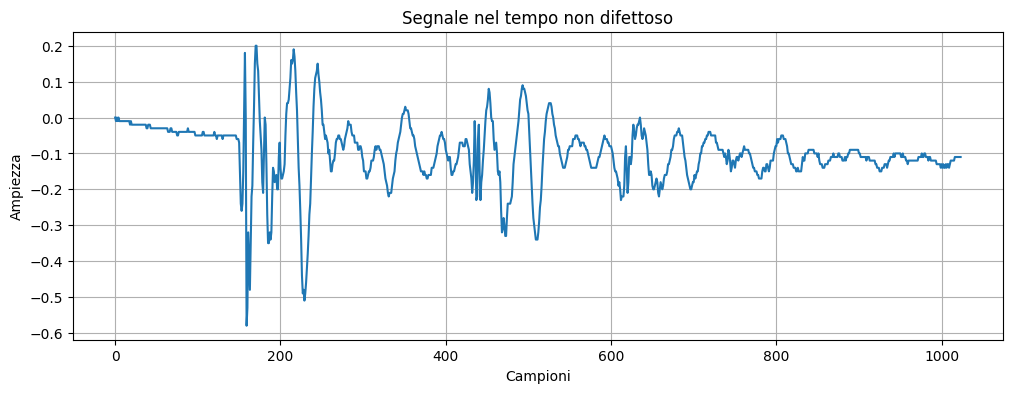

In [3]:


# Leggi il segnale dal file
file_path = '../dataset/test_object_1_1mm/A/A (2).txt'
signal = np.loadtxt(file_path)

# Crea l'asse temporale (1024 campioni)
n_samples = len(signal)
time = np.arange(n_samples)

# Oppure se conosci la frequenza di campionamento
# fs = 1000  # Hz (esempio)
# time = np.arange(n_samples) / fs

# Rappresenta il segnale
plt.figure(figsize=(12, 4))
plt.plot(time, signal)
plt.xlabel('Campioni')
plt.ylabel('Ampiezza')
plt.title('Segnale nel tempo non difettoso')
plt.grid(True)
plt.show()

# Segnale difettoso



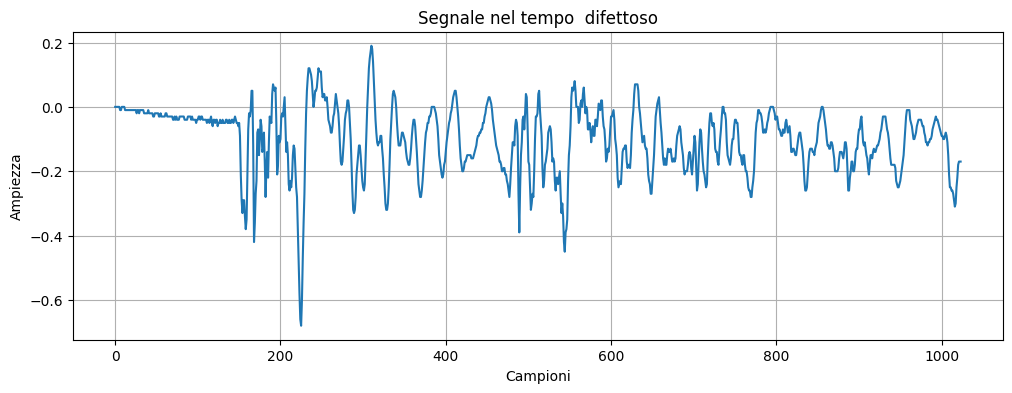

In [4]:
import sys
sys.path.append('../utils')
from getIndexesFromNumber import getIndexesFromNumber

# Leggi il segnale dal file
fileName = getIndexesFromNumber(145) + '.txt'
file_path = '../dataset/test_object_1_1mm/D/' + fileName

signalWithDefect = np.loadtxt(file_path)

# Crea l'asse temporale (1024 campioni)
n_samples = len(signalWithDefect)
time = np.arange(n_samples)

# Oppure se conosci la frequenza di campionamento
# fs = 1000  # Hz (esempio)
# time = np.arange(n_samples) / fs

# Rappresenta il segnale
plt.figure(figsize=(12, 4))
plt.plot(time, signalWithDefect)
plt.xlabel('Campioni')
plt.ylabel('Ampiezza')
plt.title(f'Segnale nel tempo  difettoso')
plt.grid(True)
plt.show()

# Analisi Tempo Frequenza

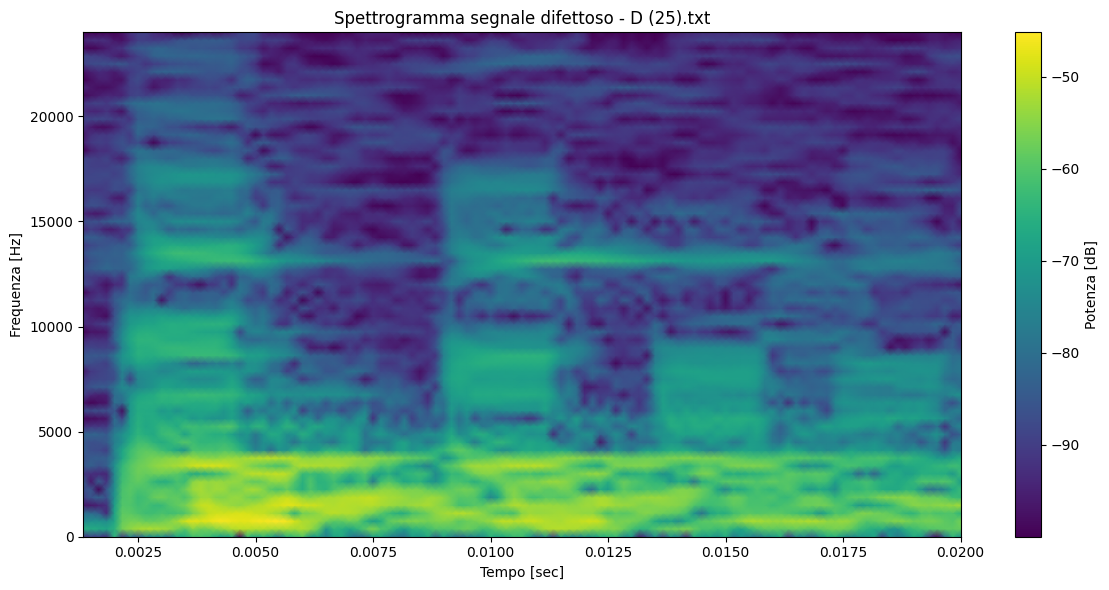

In [ ]:
from scipy import signal as sig

# Parametri per lo spettrogramma
fs = 48000  # Frequenza di campionamento 
nperseg = 128  # Lunghezza della finestra
noverlap = 120  # Overlap tra finestre



f, t, Sxx = sig.spectrogram(signalWithDefect, fs=fs, nperseg=nperseg, noverlap=noverlap)
Sxx_db = 10 * np.log10(Sxx + 1e-10) 


plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, Sxx_db, shading='gouraud', cmap='viridis')
plt.ylabel('Frequenza [Hz]')
plt.xlabel('Tempo [sec]')
plt.title(f'Spettrogramma segnale difettoso - {fileName}')
plt.colorbar(label='Potenza [dB]')
plt.tight_layout()
plt.show()

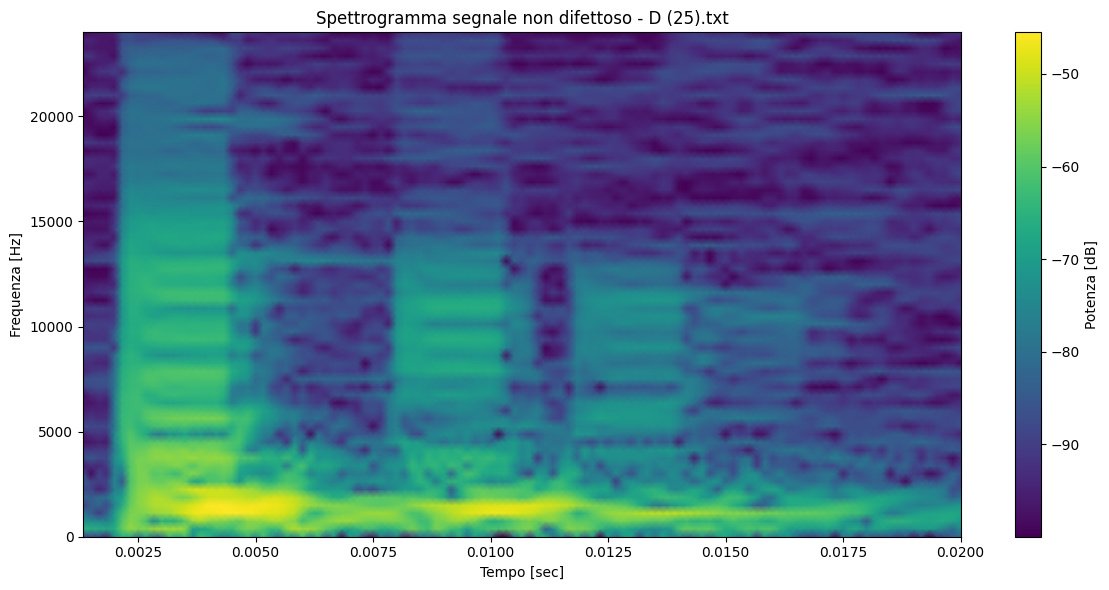

In [ ]:


f, t, Sxx = sig.spectrogram(signal, fs=fs, nperseg=nperseg, noverlap=noverlap)
Sxx_db = 10 * np.log10(Sxx + 1e-10)  # Converti in dB
    

plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, Sxx_db, shading='gouraud', cmap='viridis')
plt.ylabel('Frequenza [Hz]')
plt.xlabel('Tempo [sec]')
plt.title(f'Spettrogramma segnale non difettoso - {fileName}')
plt.colorbar(label='Potenza [dB]')
plt.tight_layout()
plt.show()

# Trasformazione con scala di MEL


Forma mel-spettrogramma: (10, 17)


/Users/dips/iatoarts/ClassificationOfTimeFrequencyDomainSignalWithNN/venv/lib/python3.9/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(


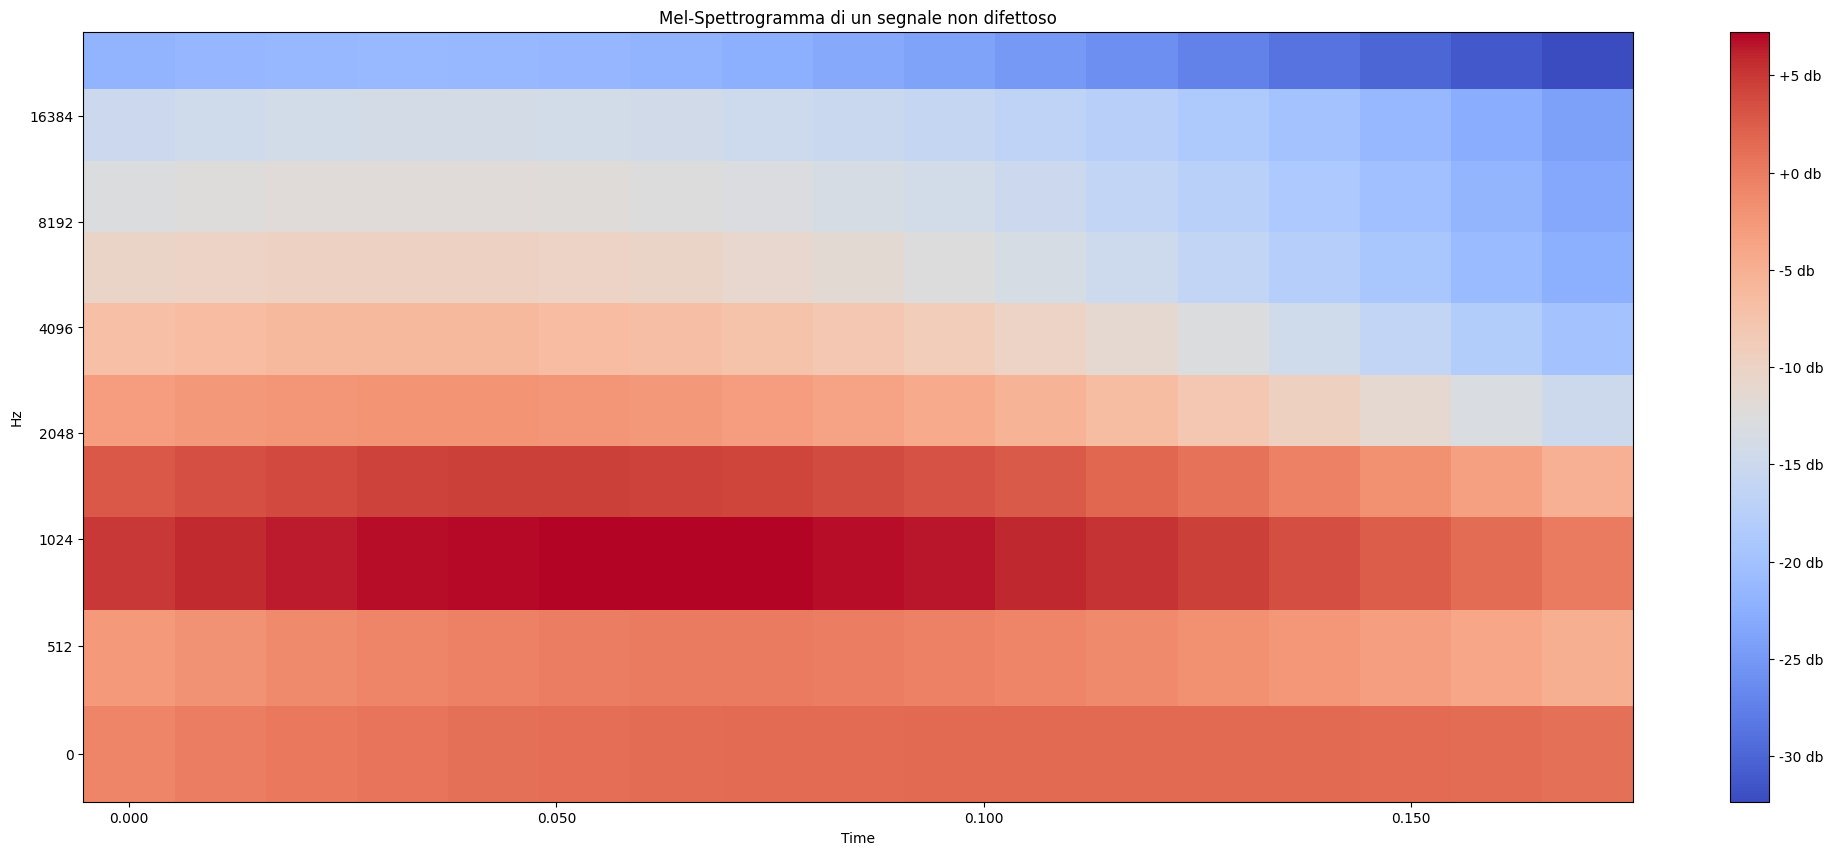

Forma mel-spettrogramma: (10, 17)


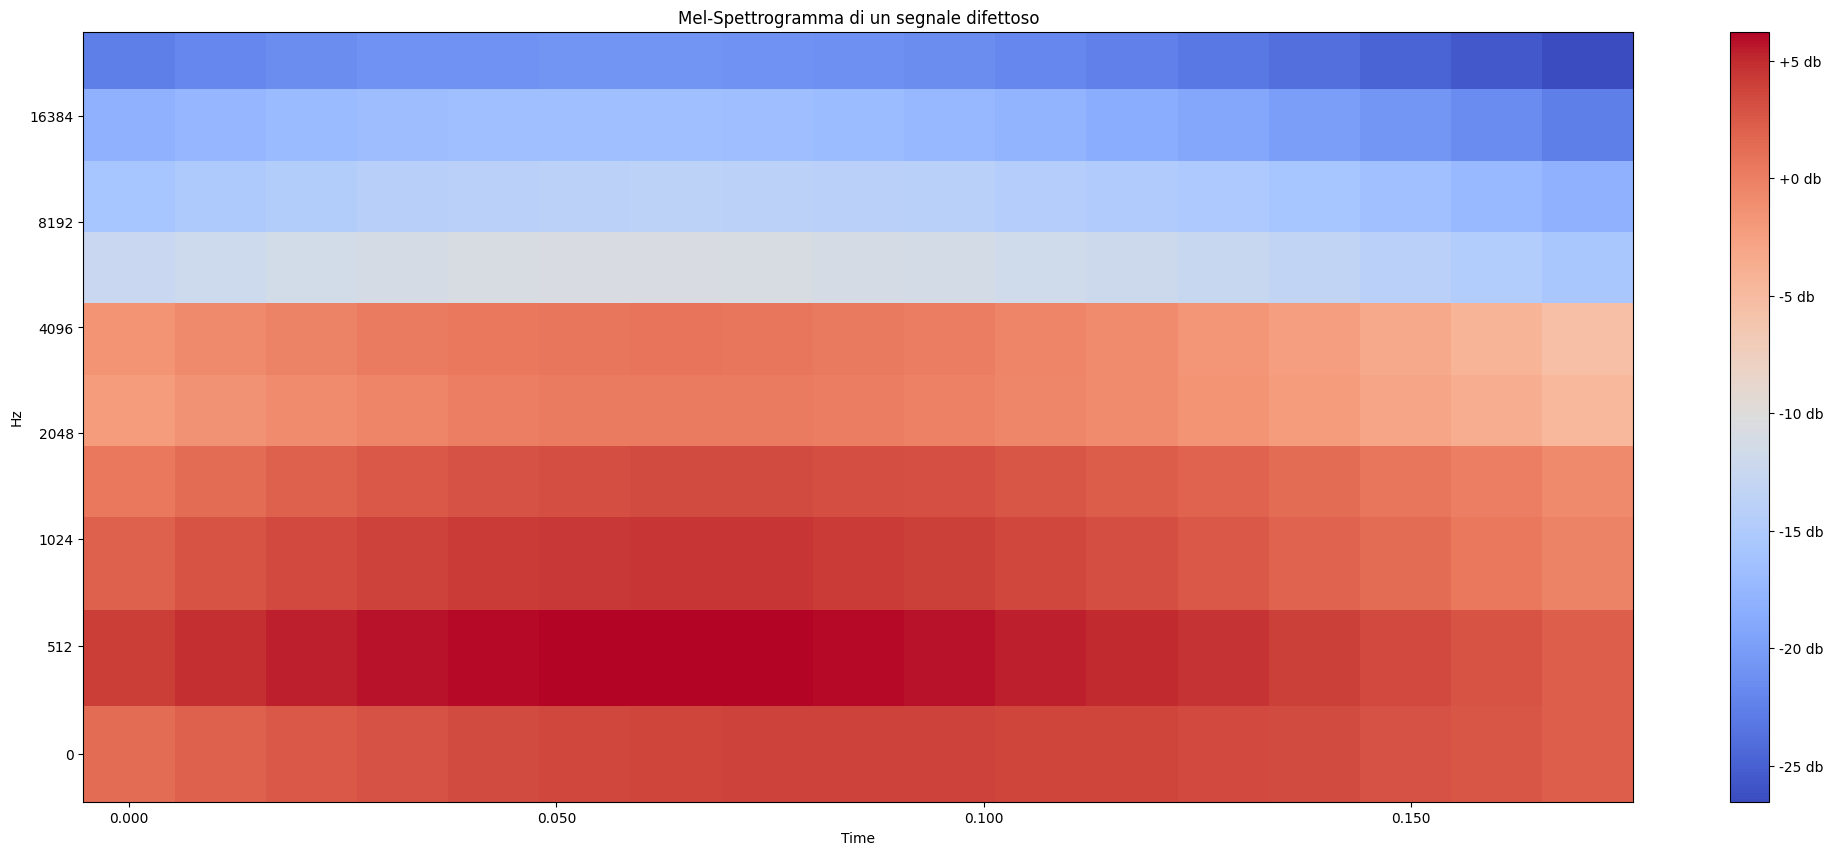

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def signal_to_mel_spectrogram(signal):
    """
    Converte un segnale temporale in mel-spettrogramma
    
    Args:
        signal: array 1D del segnale nel tempo
        sr: sample rate (frequenza di campionamento)
        n_fft: lunghezza della FFT window
        hop_length: numero di campioni tra frame consecutivi
        n_mels: numero di bande Mel
        fmin: frequenza minima
        fmax: frequenza massima (None = sr/2)
        
    Returns:
        mel_spectrogram: spettrogramma in scala Mel

    """

    mel_spec = librosa.feature.melspectrogram(
        y=signal,
        sr=48000,
        n_fft=2048,        
        hop_length=64,   
        n_mels=10,       
    )  
    return mel_spec




mel_spec_no_defect = signal_to_mel_spectrogram(signal )

print(f"Forma mel-spettrogramma: {mel_spec_no_defect.shape}")  # (n_mels, n_frames)


log_mel_spec_no_defect = librosa.power_to_db(mel_spec_no_defect)

plt.figure(figsize=(25, 10 ))
librosa.display.specshow(log_mel_spec_no_defect,x_axis='time', y_axis='mel',sr=48000 ) 
plt.colorbar(format='%+2.0f db')
plt.title('Mel-Spettrogramma di un segnale non difettoso')
plt.show()


mel_spec_defect = signal_to_mel_spectrogram(signalWithDefect)

print(f"Forma mel-spettrogramma: {mel_spec_defect.shape}")  # (n_mels, n_frames)


log_mel_spec_defect = librosa.power_to_db(mel_spec_defect)
plt.figure(figsize=(25, 10 ))
librosa.display.specshow(log_mel_spec_defect,x_axis='time', y_axis='mel',sr=48000 ) 
plt.colorbar(format='%+2.0f db')
plt.title('Mel-Spettrogramma di un segnale difettoso')
plt.show()


In [32]:
type(log_mel_spec_defect)
np.save('log_mel_spec_defect.npy', log_mel_spec_defect)